# Things to Do

## Data Visualization
In this section the focus will be on visualizing the features and cleaned data from the previous section. The objectives are as follows:
    
- Pie graphs of
    - ~~sentiment count in search~~

- Show the user distriubution on 
    - ~~incel word frequency~~
    - ~~sentiment polarity~~
    - ~~number of comments over time~~
    
- Bar plots 
    - ~~number of comments in each subreddit~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data from EDA
keywords = pd.read_csv('../data/keywords.csv')
subreddits = pd.read_csv('../data/subreddits.csv')

incelDF = pd.read_csv('../data/EDA_incelDF20230615-150301.csv')
incelDF['created_on'] = incelDF['created_on'].astype('datetime64[us]')

subreddit_sizes = pd.read_csv('../data/subreddit_sizes.csv')

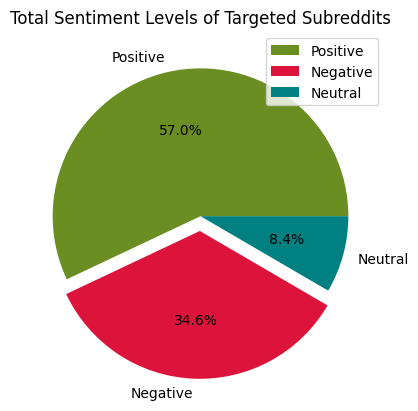

In [42]:
sentiment_flag_pie = incelDF['sentiment_flag'].value_counts()
plt.pie(sentiment_flag_pie, labels=['Positive', 'Negative', 'Neutral'], 
        colors=['olivedrab', 'crimson', 'teal'], explode=(0, 0.1, 0), autopct='%1.1f%%')
plt.title('Total Sentiment Levels of Targeted Subreddits')
plt.legend()
plt.show()

## Results
The pie chart demonstrates that their are mostly positive commetns from these targetted surbeddits. Likewise there is a moderate amount of negative comments. The neutral comments only comprise a small amount of the total comments. Based on this we can assert that subreddits tend to have positive sentiments but there is a sizable number of negative sentiments.

In [11]:
subreddit_sizes['subreddit'] = subreddit_sizes['subreddit'].astype('str')

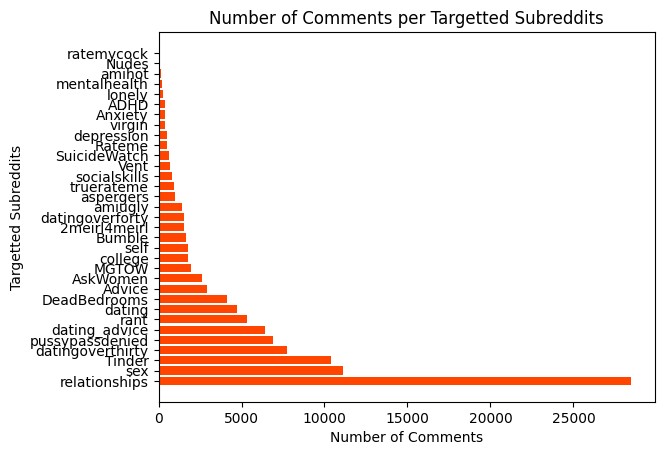

In [41]:
# Appendix
fig, ax = plt.subplots()

ax.barh(subreddit_sizes['subreddit'], subreddit_sizes['size'], color='orangered')

ax.set_title('Number of Comments per Targetted Subreddits')
plt.ylabel('Targetted Subreddits')
plt.xlabel('Number of Comments')
plt.show()

## Result
A majority of the comments come from the relationships subreddit. This could be attributed to subreddit size and overall activity. The other subreddits such as 'sex' and 'Tinder' also have a sizeable amount of comments as both are popular subreddits to talk about a users dating and sex life.

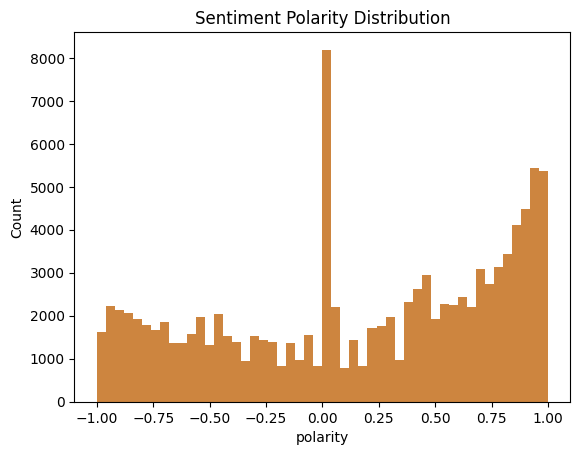

In [4]:
# Sentiment Polarity Distribution
polarity_levels = incelDF['polarity']

fig, ax = plt.subplots()

ax.hist(polarity_levels, bins=50, color='peru')
plt.xlabel('polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')
plt.show()

## Results
The sentiment polarity is considered unbalanced where most users tend to have a very beutral polarity. Moving to the right more users gain positive polarity and form a lower peak. We can assert that comments in these subreddits tend to be either positive to very positive. This aligns with the previous pie chart.

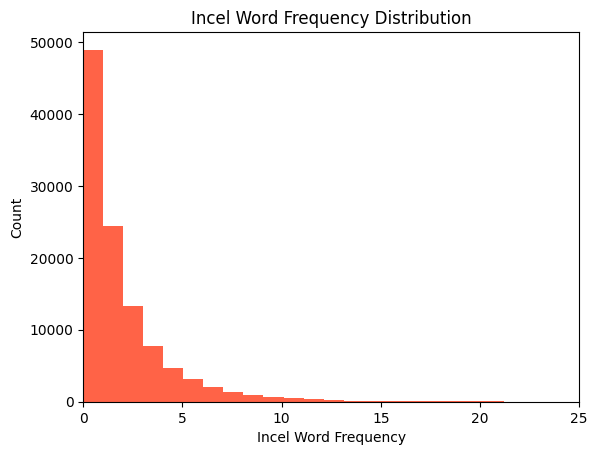

In [43]:
word_freq = incelDF['incel_word_freq']
fig, ax = plt.subplots()

ax.hist(word_freq, bins=100, color='tomato')
plt.xlabel('Incel Word Frequency')
plt.xlim(0, 25)
plt.ylabel('Count')
plt.title('Incel Word Frequency Distribution')
plt.show()

## Results
The incel word distribution is right tailed skewed where most users use less than 5 incel words from our keywords list. Beyond that we see less frequency of these words. This means that comments that contain more that 5 words are less likely to happen.

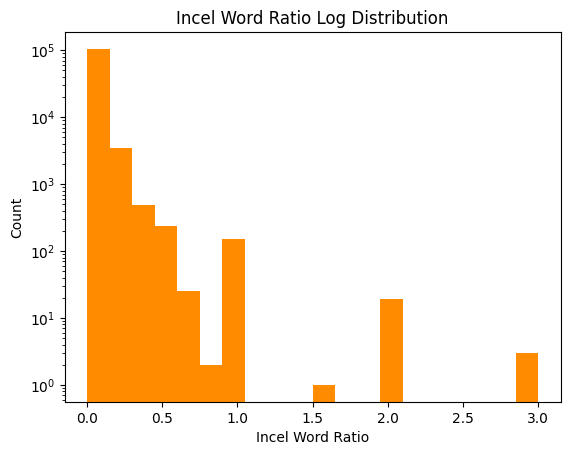

In [52]:
word_ratio = incelDF['incel_word_ratio']
fig, ax = plt.subplots()

ax.hist(word_ratio, bins=20, color='darkorange')
plt.xlabel('Incel Word Ratio')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Incel Word Ratio Log Distribution')
plt.show()

## Results
The distribution shows us that most comments have less than 1.0 ratio of incel words to comment length. This could mean that redditors from these communities use at least one of the words from our keywords list. This is supported by the previous incel word distribution.

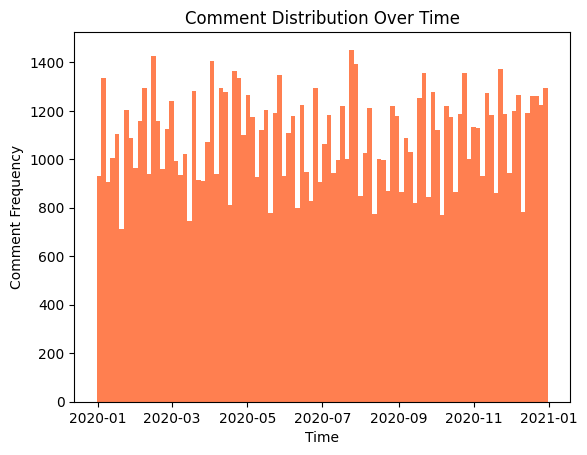

In [5]:
# Appendix
comment_time = incelDF['created_on']
fig, ax = plt.subplots()

ax.hist(comment_time, bins=100, color='coral')
plt.xlabel('Time')
plt.ylabel('Comment Frequency')
plt.title('Comment Distribution Over Time')
plt.show()

## Results
The comment frequency distribution shows a consistent comment frequency above 700 over the year 2020.